# Import 

In [41]:
import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D
from keras.optimizers import SGD,Adam
from keras import regularizers
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read File From Text File In Line

In [3]:
file_path = 'corpus_all.txt'  # Replace with the actual path to your text file

lines = []  # Empty list to store the lines

try:
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            lines.append(line.strip())  # Append the line to the list, removing any leading/trailing whitespace

except FileNotFoundError:
    print("File not found. Please check the file path and try again.")

print(lines[0])



sad	বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বাংলাদেশ সরকার। মাননীয় প্রধানমন্ত্রী, আমি আপনার স্বপ্নের ডিজিটাল বাংলাদেশের স্বপ্ন বুকে লালনকারী একজন সাধারণ ছাত্র। শত সহস্র আশা এবং দেশের প্রতি এক অকৃত্তিম ভালোবাসা এবং নিজেকে দেশের জন্য যোগ্য করে গড়ে তোলার এক তীব্র আকাঙ্ক্ষা নিয়ে ভর্তি হয়েছিলাম আপনার নিজ হাতে প্রতিষ্ঠিত দেশের অন্যতম বিশ্ববিদ্যালয় যশোর বিজ্ঞান ও প্রযুক্তি বিশ্ববিদ্যালয়ে। একটি ডিজিটাল বাংলাদেশ গড়তে এ ধরণের একটি প্রযুক্তি বিশ্ববিদ্যালয় প্রতিষ্ঠা করা নিঃসন্দেহে আপনার দেশ পরিচালনার একটি বিচক্ষণতার পরিচয় বহন করে। আপনি যশোর বাসির স্বপ্নের এই প্রতিষ্ঠানে শত শত কোটি টাকা বিনিয়োগ করেছেন দুহাত উজাড় করে। কিন্তু অত্যন্ত দুঃখের সাথে সেই বিশ্ববিদ্যালয় জীবনের সূচনালগ্ন থেকে অনুভব করছি যে, অনেক পাওয়ার আনন্দে যখন শিক্ষার্থীদের মনপ্রান উজাড় করে পড়ালেখা করার কথা, তার বিপরীতে এই কমলমতি শিক্ষার্থীরা সদা দিনাতিপাত করছে প্রাণ নাশের হুমকি, শ্লীলতাহানীর গ্লানি, আর ছাত্রত্ত বাতিল হওয়ার হুমকি নিয়ে। সম্মানিত শিক্ষকদের কে মারতে যাওয়া, গলা কেটে ফেলার হুমকি, প্রাণ নাশের হুমকি, কটূক্ত

# Split Each Line Sentence And Status Array

In [4]:
#file_path = 'corpus_all.txt'  # Replace with the actual path to your text file
first_words = []  # Empty list to store the first words

try:
    for line in lines:
        words = line.strip().split()  # Split the line into words
        if words:
            first_word = words[0]  # Get the first word
            first_words.append(first_word)  # Append the first word to the list

except FileNotFoundError:
    print("File not found. Please check the file path and try again.")

# Print the first words or perform any desired processing
distinct_values = set(first_words)
print(distinct_values)


{'surprise', 'sad', 'fear', 'happy', 'angry', 'disgust'}


# Convert Array To Data Frame

In [5]:

# Define the status levels
status_levels = ["happy","angry","fear","disgust","sad","surprise"]

# Initialize a list to store the extracted status levels and sentences
extracted_data = []

# Iterate over the texts
for text in lines:
    # Initialize variables to store the extracted status level and sentence
    status = ""
    sentence = ""

    # Iterate over the status levels
    for level in status_levels:
        if level in text:
            # Split the text based on the status level
            split_text = text.split(level, 1)

            # Extract the status level and sentence
            status = level
            sentence = split_text[1].strip()
            break

    # Append the extracted status level and sentence to the list
    extracted_data.append({"Status": status, "Sentence": sentence})
df = pd.DataFrame(extracted_data)

# Data Set Analysis

In [6]:
df.shape

(6289, 2)

In [7]:
df.head(5)

,Status,Sentence
0,sad,"বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা..."
1,sad,তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু...
2,angry,দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের...
3,happy,আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্ধ...
4,angry,রাতের বেলা আবার কিসের সকাল।


In [8]:
df['Sentence'].value_counts()

ধন্যবাদ                                                                                                                                                                 27
বিচার চাই                                                                                                                                                                8
শালা, ,,,,দিন বদলের মাগি সরকার এখন বিরধিদের দমনে বিজি,,,,                                                                                                                6
নাস্তিকদের দালাল একাওর টিভি বন্ধ করা হোক,https://www.facebook.com/events/510113745860941                                                                                 6
ধন্যবাদ পুলিশ ভাই                                                                                                                                                        5
                                                                                                                                                 

# Status Count

In [9]:
df['Status'].value_counts()

happy       1905
angry       1410
sad         1331
disgust      698
surprise     562
fear         383
Name: Status, dtype: int64

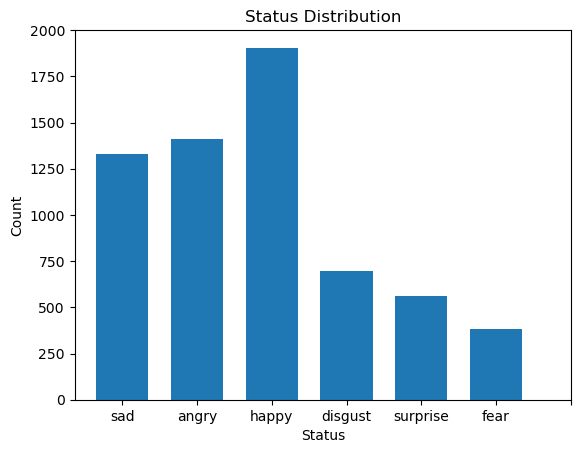

In [10]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.hist(df['Status'], bins=[0, 1, 2, 3, 4, 5, 6], align='left', rwidth=0.7)
plt.xticks([0, 1, 2, 3, 4, 5, 6])
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Status Distribution')
plt.show()

# Sentence Pre Processing

In [11]:
import re
from re import sub
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [12]:
df['Sentence'][0]

'বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বাংলাদেশ সরকার। মাননীয় প্রধানমন্ত্রী, আমি আপনার স্বপ্নের ডিজিটাল বাংলাদেশের স্বপ্ন বুকে লালনকারী একজন সাধারণ ছাত্র। শত সহস্র আশা এবং দেশের প্রতি এক অকৃত্তিম ভালোবাসা এবং নিজেকে দেশের জন্য যোগ্য করে গড়ে তোলার এক তীব্র আকাঙ্ক্ষা নিয়ে ভর্তি হয়েছিলাম আপনার নিজ হাতে প্রতিষ্ঠিত দেশের অন্যতম বিশ্ববিদ্যালয় যশোর বিজ্ঞান ও প্রযুক্তি বিশ্ববিদ্যালয়ে। একটি ডিজিটাল বাংলাদেশ গড়তে এ ধরণের একটি প্রযুক্তি বিশ্ববিদ্যালয় প্রতিষ্ঠা করা নিঃসন্দেহে আপনার দেশ পরিচালনার একটি বিচক্ষণতার পরিচয় বহন করে। আপনি যশোর বাসির স্বপ্নের এই প্রতিষ্ঠানে শত শত কোটি টাকা বিনিয়োগ করেছেন দুহাত উজাড় করে। কিন্তু অত্যন্ত দুঃখের সাথে সেই বিশ্ববিদ্যালয় জীবনের সূচনালগ্ন থেকে অনুভব করছি যে, অনেক পাওয়ার আনন্দে যখন শিক্ষার্থীদের মনপ্রান উজাড় করে পড়ালেখা করার কথা, তার বিপরীতে এই কমলমতি শিক্ষার্থীরা সদা দিনাতিপাত করছে প্রাণ নাশের হুমকি, শ্লীলতাহানীর গ্লানি, আর ছাত্রত্ত বাতিল হওয়ার হুমকি নিয়ে। সম্মানিত শিক্ষকদের কে মারতে যাওয়া, গলা কেটে ফেলার হুমকি, প্রাণ নাশের হুমকি, কটূক্তি ক

In [13]:
preprocessing(df['Sentence'][0])

'বরাবর মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বাংলাদেশ সরকার মাননীয় প্রধানমন্ত্রী আমি আপনার স্বপ্নের ডিজিটাল বাংলাদেশের স্বপ্ন বুকে লালনকারী একজন সাধারণ ছাত্র শত সহস্র আশা এবং দেশের প্রতি এক অকৃত্তিম ভালোবাসা এবং নিজেকে দেশের জন্য যোগ্য করে গড়ে তোলার এক তীব্র আকাঙ্ক্ষা নিয়ে ভর্তি হয়েছিলাম আপনার নিজ হাতে প্রতিষ্ঠিত দেশের অন্যতম বিশ্ববিদ্যালয় যশোর বিজ্ঞান ও প্রযুক্তি বিশ্ববিদ্যালয়ে একটি ডিজিটাল বাংলাদেশ গড়তে এ ধরণের একটি প্রযুক্তি বিশ্ববিদ্যালয় প্রতিষ্ঠা করা নিঃসন্দেহে আপনার দেশ পরিচালনার একটি বিচক্ষণতার পরিচয় বহন করে আপনি যশোর বাসির স্বপ্নের এই প্রতিষ্ঠানে শত শত কোটি টাকা বিনিয়োগ করেছেন দুহাত উজাড় করে কিন্তু অত্যন্ত দুঃখের সাথে সেই বিশ্ববিদ্যালয় জীবনের সূচনালগ্ন থেকে অনুভব করছি যে অনেক পাওয়ার আনন্দে যখন শিক্ষার্থীদের মনপ্রান উজাড় করে পড়ালেখা করার কথা তার বিপরীতে এই কমলমতি শিক্ষার্থীরা সদা দিনাতিপাত করছে প্রাণ নাশের হুমকি শ্লীলতাহানীর গ্লানি আর ছাত্রত্ত বাতিল হওয়ার হুমকি নিয়ে সম্মানিত শিক্ষকদের কে মারতে যাওয়া গলা কেটে ফেলার হুমকি প্রাণ নাশের হুমকি কটূক্তি করা আজ এখানে নিয

In [14]:
df['Sentence'] = df.Sentence.apply(lambda x: preprocessing(str(x)))

In [15]:
df.reset_index(drop=True, inplace=True)

# Test Train Data Split

In [16]:
train1, test1 = train_test_split(df,random_state=40, test_size=0.2)

print("Data Shape :")
print(df.shape)
print("Train Shape :")
print(train1.shape)
print("Test Shape :")
print(test1.shape)


Data Shape :
(6289, 2)
Train Shape :
(5031, 2)
Test Shape :
(1258, 2)


# Tast Train Data Sentence Convert In Array

In [17]:

training_sentences = []
testing_sentences = []

train_sentences=train1['Sentence'].values
train_labels=train1['Status'].values

for i in range(train_sentences.shape[0]): 
    x=str(train_sentences[i])
    training_sentences.append(x)
    
training_sentences=np.array(training_sentences)

test_sentences=test1['Sentence'].values
test_labels=test1['Status'].values

for i in range(test_sentences.shape[0]):     
    x=str(test_sentences[i])
    testing_sentences.append(x)
    
testing_sentences=np.array(testing_sentences)


# Encode The Test And Train Label

Train Label Status

In [18]:
set(train_labels)

{'angry', 'disgust', 'fear', 'happy', 'sad', 'surprise'}

Test Label Status

In [19]:
set(test_labels)

{'angry', 'disgust', 'fear', 'happy', 'sad', 'surprise'}

In [20]:

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)

print("Training Set Length: "+str(len(train1)))
print("Testing Set Length: "+str(len(test1)))

print("training_sentences shape: "+str(training_sentences.shape))
print("testing_sentences shape: "+str(testing_sentences.shape))

print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))


Training Set Length: 5031
Testing Set Length: 1258
training_sentences shape: (5031,)
testing_sentences shape: (1258,)
train_labels shape: (5031,)
test_labels shape: (1258,)


In [21]:
print(set(test_labels))

{0, 1, 2, 3, 4, 5}


In [23]:
print(set(train_labels))

{0, 1, 2, 3, 4, 5}


# Sentences Tokenizer

In [24]:
vocab_size = 25000
embedding_dim = 300
max_length = 100
trunc_type='post'
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)


In [25]:
print('training_sentences : ')
print(training_sentences[0])
tokenizer.fit_on_texts(training_sentences[0])

word_index = tokenizer.word_index
print('word_index : ')
print(word_index)
print("Word index length:"+str(len(tokenizer.word_index)))

sequences = tokenizer.texts_to_sequences(training_sentences[0])
print('sequences : ')
print(sequences)

padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)
print('padded : ')
print(padded)


training_sentences : 
বায়বীয় সরকার যে তাই বায়বীয় তেই বেশি ভয়
word_index : 
{'<OOV>': 1, 'ব': 2, 'য়': 3, 'া': 4, 'ে': 5, 'ী': 6, 'র': 7, 'ত': 8, 'ই': 9, 'স': 10, 'ক': 11, 'য': 12, 'শ': 13, 'ি': 14, 'ভ': 15}
Word index length:15
sequences : 
[[2], [4], [3], [2], [6], [3], [], [10], [7], [11], [4], [7], [], [12], [5], [], [8], [4], [9], [], [2], [4], [3], [2], [6], [3], [], [8], [5], [9], [], [2], [5], [13], [14], [], [15], [3]]
padded : 
[[ 0  0  0 ...  0  0  2]
 [ 0  0  0 ...  0  0  4]
 [ 0  0  0 ...  0  0  3]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 15]
 [ 0  0  0 ...  0  0  3]]


In [26]:
print(testing_sentences[0])
test_sequences = tokenizer.texts_to_sequences(testing_sentences[0])
print('test_sequences : ')
print(test_sequences)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)
print('\ntesting_padded : ')
print(testing_padded)


হায় হায় আপনার নামতো আজই রাজাকারের লিস্টে চলে যাবে
test_sequences : 
[[1], [4], [3], [], [1], [4], [3], [], [1], [1], [1], [4], [7], [], [1], [4], [1], [8], [1], [], [1], [1], [9], [], [7], [4], [1], [4], [11], [4], [7], [5], [7], [], [1], [14], [10], [1], [1], [5], [], [1], [1], [5], [], [12], [4], [2], [5]]

testing_padded : 
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 4]
 [0 0 0 ... 0 0 3]
 ...
 [0 0 0 ... 0 0 4]
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 5]]


In [27]:

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
print("Word index length:"+str(len(tokenizer.word_index)))

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)


Word index length:15455


In [28]:
print("Sentence :--> \n")
print(training_sentences[2]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[2])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[2])

print("testing_sentences :--> \n")
print(testing_sentences[2]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(test_sequences[2])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(testing_padded[2])

Sentence :--> 

এভাবেই শত শত প্রতিবাদীরা আপনার দলে যোগ দেবে যেভাবে মুক্তিযোদ্ধারা দেশকে স্বাধীন করেছিলোজাতির পিতা শেখ মুজিব ও স্বাধীনতার ঘোসক জিয়াউর রহমানের মত আপনার এ ডাকে একদিন বাংগালী ঠিকই জেগে উঠবে আল্লাহ আপনাকে লোভ ও লালসা থেকে দূরে রাখুকএটাই আমার কামনা      ইউসুফস্যার

Sentence Tokenized and Converted into Sequence :--> 

[1166, 1415, 1415, 5698, 9, 1416, 1278, 971, 544, 5699, 902, 781, 5700, 2275, 604, 3670, 8, 2276, 5701, 5702, 1908, 66, 9, 37, 3671, 267, 2825, 1909, 1417, 3672, 118, 78, 1910, 8, 5703, 35, 1616, 5704, 25, 293, 5705]

After Padding the Sequence with padding length 100 :--> 

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0 1166 1415 1415 5698    9 1416 1278  971  544 5699  902
  781 5700 2275  604 3670    8 2276 570

In [29]:
print("Padded shape(training): "+str(padded.shape))
print("Padded shape(testing): "+str(testing_padded.shape))

Padded shape(training): (5031, 100)
Padded shape(testing): (1258, 100)


In [30]:
training_sentences[0]

'বায়বীয় সরকার যে তাই বায়বীয় তেই বেশি ভয়'

In [31]:
train_labels[0]

1

In [32]:
testing_sentences[0]

'হায় হায় আপনার নামতো আজই রাজাকারের লিস্টে চলে যাবে'

In [33]:
test_labels[0]

0

In [34]:
from keras.utils import to_categorical

# Convert numeric labels to one-hot encoded vectors
train_labels = to_categorical(train_labels, num_classes=6)
test_labels = to_categorical(test_labels, num_classes=6)

In [35]:
print(train_labels[0])

[0. 1. 0. 0. 0. 0.]


In [36]:
print(test_labels[0])

[1. 0. 0. 0. 0. 0.]


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [54]:
# tfidf = TfidfVectorizer(max_features= 2500, min_df= 2)
# X_train = tfidf.fit_transform(training_sentences).toarray()
# X_test = tfidf.transform(testing_sentences).toarray()
# y_train = label_encoder.fit_transform(train_labels)
# y_test = label_encoder.fit_transform(test_labels)

X_train = padded
X_test = testing_padded
y_train = train_labels
y_test = test_labels

In [58]:
print('X_train : ')
print(X_train[0])
print('X_test : ')
print(X_test[0])
print('y_train : ')
print(y_train[0])
print('y_test : ')
print(y_test[0])

X_train : 
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0 1058   62   12   80 1058 5696
  146  171]
X_test : 
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0 1954 195

In [56]:

from scikitplot.metrics import plot_confusion_matrix, plot_roc

def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
#     y_prob = model.predict_proba(X_test)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    precision = round(precision_score(y_test, y_pred,average="micro"),3)
    recall = round(recall_score(y_test, y_pred,average="micro"),3)

    print(f'Accuracy of the model: {accuracy}')
    print(f'Precision Score of the model: {precision}')
    print(f'Recall Score of the model: {recall}')

#     sns.set_context('notebook', font_scale= 1.3)
#     fig, ax = plt.subplots(1, 2, figsize = (25,  8))
#     ax1 = plot_confusion_matrix(y_test, y_pred, ax= ax[0], cmap= 'YlGnBu')
#     ax2 = plot_roc(y_test, y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

In [57]:
nb = MultinomialNB()
train_model(nb)

ValueError: y should be a 1d array, got an array of shape (5031, 6) instead.

In [173]:
with tf.device('/gpu:0'):
    model= Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    #model.add(Conv1D(200, kernel_size=3, activation = "relu"))
    model.add(Conv1D(200, kernel_size=3, activation = "tanh"))
    #model.add(Conv1D(200, kernel_size=3, activation = "sigmoid"))
    model.add(Bidirectional(LSTM(32, return_sequences=True)))
    model.add(Dropout(0.02))
    model.add(Bidirectional(LSTM(32)))
    #model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='tanh'))
    #model.add(Dense(50, activation='sigmoid'))
    model.add(Flatten())
    #l2 regularizer
    #model.add(Dense(100,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
    model.add(Dense(100,kernel_regularizer=regularizers.l2(0.01),activation="tanh"))
    #model.add(Dense(100,kernel_regularizer=regularizers.l2(0.01),activation="sigmoid"))
    model.add(Dense(6, activation='softmax'))
    #sgd= SGD(lr=0.0001,decay=1e-6,momentum=0.9,nesterov=True)
    adam=Adam(learning_rate=0.01,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
    model.summary()
    model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
    
#     model = Sequential()
#     model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
#     model.add(Conv1D(hp.Int('conv_units', min_value=32, max_value=256, step=32), kernel_size=3, activation='tanh'))
#     model.add(Bidirectional(LSTM(hp.Int('lstm_units', min_value=32, max_value=128, step=32), return_sequences=True)))
#     model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
#     model.add(Bidirectional(LSTM(hp.Int('lstm_units', min_value=32, max_value=128, step=32))))
#     model.add(Dense(hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='tanh'))
#     model.add(Dense(6, activation='softmax'))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 300)          7500000   
                                                                 
 conv1d_1 (Conv1D)           (None, 98, 200)           180200    
                                                                 
 bidirectional_2 (Bidirectio  (None, 98, 64)           59648     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 98, 64)            0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 50)               

In [123]:
    history=model.fit(padded,train_labels,epochs=5,batch_size=256,validation_data=(testing_padded,test_labels),use_multiprocessing=True, workers=8)

Epoch 1/5
20/20 [==============================] - 126s 6s/step - loss: 2.0467 - accuracy: 0.3105 - val_loss: 1.6422 - val_accuracy: 0.4340
Epoch 2/5
20/20 [==============================] - 113s 6s/step - loss: 1.4246 - accuracy: 0.5257 - val_loss: 1.5360 - val_accuracy: 0.4595
Epoch 3/5
20/20 [==============================] - 106s 5s/step - loss: 1.0518 - accuracy: 0.6372 - val_loss: 1.6277 - val_accuracy: 0.4571
Epoch 4/5
20/20 [==============================] - 106s 5s/step - loss: 0.8110 - accuracy: 0.7124 - val_loss: 1.7255 - val_accuracy: 0.4459
Epoch 5/5
20/20 [==============================] - 105s 5s/step - loss: 0.6408 - accuracy: 0.7597 - val_loss: 2.0757 - val_accuracy: 0.4380


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


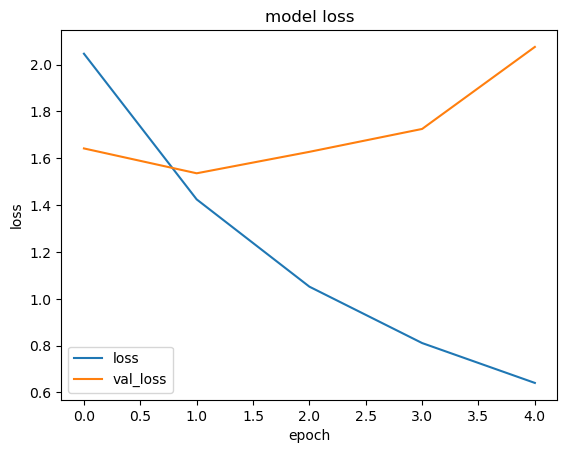

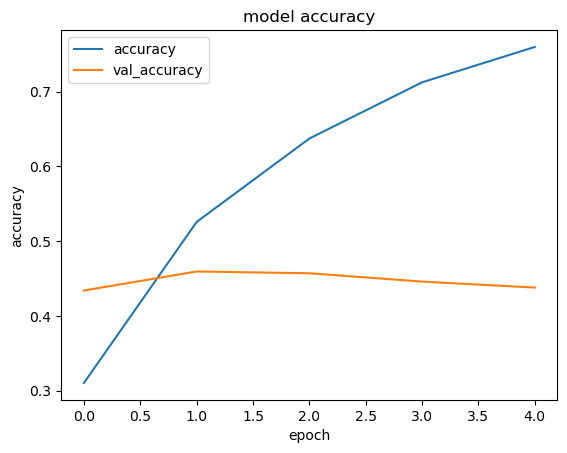

In [124]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [20]:
train_sentences=train1['Sentence'].values
train_labels=train1['Status'].values

test_sentences=test1['Sentence'].values
test_labels=test1['Status'].values

print(train_sentences)
print(train_labels)
print(test_sentences)
print(test_labels)

['বায়বীয় সরকার যে তাই বায়বীয় তেই বেশি ভয়'
 'তার পরেও বলবো ওরা বালোনা গুস খোর'
 'এভাবেই শত শত প্রতিবাদীরা আপনার দলে যোগ দেবে যেভাবে মুক্তিযোদ্ধারা দেশকে স্বাধীন করেছিলোজাতির পিতা শেখ মুজিব ও স্বাধীনতার ঘোসক জিয়াউর রহমানের মত আপনার এ ডাকে একদিন বাংগালী ঠিকই জেগে উঠবে আল্লাহ আপনাকে লোভ ও লালসা থেকে দূরে রাখুকএটাই আমার কামনা      ইউসুফস্যার'
 ...
 'ভাই জইএস্তিক নাকি কইসে  থেকে আপ্নাকে সবার   দিতে জই এর চেয়ে এখন আপ্নার পপুলারিতি বেশি ওর হিন্সা হসসে মনে হই'
 'যতদুর পারে আপনার শক্রি দিয়ে ওর বাবার কাছে পৌছিয়ে দিবেন স্যার'
 'হাহাহা লোল সরকার তো তোর দল']
['disgust' 'disgust' 'happy' ... 'sad' 'fear' 'happy']
['হায় হায় আপনার নামতো আজই রাজাকারের লিস্টে চলে যাবে'
 'লেখেন ভালোই ক্যামেরার সামনে তোতলান ক্যা'
 'এতদিন পরে বুঝতে পারার জন্য আপনাকে ধন্যবাদ' ...
 'ভাই এইসব জানোয়ারের বাচ্চা'
 'আজ মুশফিকখুর আর মাহামুদুলা বাংলা দেশের যেই শরবো নাশ টা করলো এটা কখনো বাংলার জাতি কনো দিন মনে নিতে পারবেনা এতো তারা তারি করলো কেনো আমর তো মনে হয় এতে কনো গাবলা আছে তালে বলে ই রান না হয় এটা মানে হয় না'
 'ধন্যবাদ']
['angry

In [102]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Bidirectional, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# Assuming you have already imported the necessary libraries and defined the model function 'build_model'

# Preprocess the text data and convert it to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_sentences)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

# Padding sequences to the same length
max_length = 100  # Choose an appropriate maximum sequence length
train_sequences = pad_sequences(train_sequences, maxlen=max_length)
test_sequences = pad_sequences(test_sequences, maxlen=max_length)

# Convert labels to integers
label_to_index = {label: index for index, label in enumerate(np.unique(train_labels))}
train_labels_indexed = np.array([label_to_index[label] for label in train_labels])
test_labels_indexed = np.array([label_to_index[label] for label in test_labels])

# Convert labels to one-hot encoded format
num_classes = len(np.unique(train_labels_indexed))
train_labels_onehot = to_categorical(train_labels_indexed, num_classes=num_classes)
test_labels_onehot = to_categorical(test_labels_indexed, num_classes=num_classes)

# Define the model building function with hyperparameters
def build_model(hp):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(Conv1D(hp.Int('conv_units', min_value=32, max_value=256, step=32), kernel_size=3, activation='tanh'))
    model.add(Bidirectional(LSTM(hp.Int('lstm_units', min_value=32, max_value=128, step=32), return_sequences=True)))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Bidirectional(LSTM(hp.Int('lstm_units', min_value=32, max_value=128, step=32))))
    model.add(Dense(hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='tanh'))
    model.add(Dense(6, activation='softmax'))
    
    adam = Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# Now you can use the processed data with Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_directory'
)

# Start the hyperparameter search
tuner.search(train_sequences, train_labels_onehot, epochs=5, validation_data=(test_sequences, test_labels_onehot))

# Get the optimal hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 5 Complete [00h 18m 01s]
val_accuracy: 0.46899840235710144

Best val_accuracy So Far: 0.4793322682380676
Total elapsed time: 00h 41m 36s
INFO:tensorflow:Oracle triggered exit


In [105]:
# Assuming you have retrieved the best hyperparameters list, which contains a single HyperParameters object
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)

# Extract the HyperParameters object from the list
best_hyperparameters = best_hyperparameters[0]

# Access individual hyperparameters using the 'get' method
learning_rate = best_hyperparameters.get('learning_rate')
conv_units = best_hyperparameters.get('conv_units')
lstm_units = best_hyperparameters.get('lstm_units')
dropout_rate = best_hyperparameters.get('dropout_rate')
dense_units = best_hyperparameters.get('dense_units')

# Print the hyperparameter values
print("Best Hyperparameters:")
print("Learning Rate:", learning_rate)
print("Convolution Units:", conv_units)
print("LSTM Units:", lstm_units)
print("Dropout Rate:", dropout_rate)
print("Dense Units:", dense_units)


Best Hyperparameters:
Learning Rate: 0.01
Convolution Units: 32
LSTM Units: 32
Dropout Rate: 0.2
Dense Units: 32


In [36]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from itertools import chain

# Assuming you have already imported the necessary libraries and defined the model function 'build_model'

# Preprocess the text data and convert it to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_sentences)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

# Padding sequences to the same length
max_length = 100  # Choose an appropriate maximum sequence length
train_sequences = pad_sequences(train_sequences, maxlen=max_length)
test_sequences = pad_sequences(test_sequences, maxlen=max_length)

# Flatten the lists of labels
train_labels_list = list(chain.from_iterable(train_labels.tolist()))
test_labels_list = list(chain.from_iterable(test_labels.tolist()))

# Convert labels to integers
label_to_index = {label: index for index, label in enumerate(np.unique(train_labels_list))}
train_labels_indexed = np.array([label_to_index[label] for label in train_labels_list])
test_labels_indexed = np.array([label_to_index[label] for label in test_labels_list])

# Convert labels to one-hot encoded format
num_classes = len(np.unique(train_labels_indexed))
train_labels_onehot = to_categorical(train_labels_indexed, num_classes=num_classes)
test_labels_onehot = to_categorical(test_labels_indexed, num_classes=num_classes)

# Define the model building function with hyperparameters
def build_model(hp):
    # Build your model here, including the learning rate hyperparameter
    adam = Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# Assuming you have trained the model with the best hyperparameters using Keras Tuner
# model = build_model(best_hyperparameters)
# model.fit(train_sequences, train_labels_onehot, epochs=5, validation_data=(test_sequences, test_labels_onehot))

# Make predictions on the test dataset
y_pred = model.predict(test_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels

# Create the confusion matrix
confusion_mtx = confusion_matrix(test_labels_indexed, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)

# Visualize the confusion matrix as a heatmap
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, np.unique(train_labels_list), rotation=45)
plt.yticks(tick_marks, np.unique(train_labels_list))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Generate the classification report
print("Classification Report:")
print(classification_report(test_labels_indexed, y_pred_classes))


40/40 [==============================] - 8s 133ms/step


ValueError: Found input variables with inconsistent numbers of samples: [7548, 1258]